In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
from pyspark.sql import SparkSession

#spark session
spark= SparkSession.builder.appName("IPL Data Analysis").getOrCreate()

In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
from pyspark.sql.types import StructField , StructType, StringType, IntegerType, BooleanType, DecimalType , DataType
from pyspark.sql.functions import avg, sum , when , col ,lower  ,regexp_replace
from pyspark.sql.window import Window

In [0]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, BooleanType, DateType

# Define the schema for the Ball_By_Ball.csv file
ball_by_ball_schema = StructType([
    StructField("match_id", IntegerType(), True),
    StructField("over_id", IntegerType(), True),
    StructField("ball_id", IntegerType(), True),
    StructField("innings_no", IntegerType(), True),
    StructField("team_batting", StringType(), True),
    StructField("team_bowling", StringType(), True),
    StructField("striker_batting_position", IntegerType(), True),
    StructField("extra_type", StringType(), True),
    StructField("runs_scored", IntegerType(), True),
    StructField("extra_runs", IntegerType(), True),
    StructField("wides", IntegerType(), True),
    StructField("legbyes", IntegerType(), True),
    StructField("byes", IntegerType(), True),
    StructField("noballs", IntegerType(), True),
    StructField("penalty", IntegerType(), True),
    StructField("bowler_extras", IntegerType(), True),
    StructField("out_type", StringType(), True),
    StructField("caught", BooleanType(), True),
    StructField("bowled", BooleanType(), True),
    StructField("run_out", BooleanType(), True),
    StructField("lbw", BooleanType(), True),
    StructField("retired_hurt", BooleanType(), True),
    StructField("stumped", BooleanType(), True),
    StructField("caught_and_bowled", BooleanType(), True),
    StructField("hit_wicket", BooleanType(), True),
    StructField("obstructingfeild", BooleanType(), True),
    StructField("bowler_wicket", BooleanType(), True),
    StructField("match_date", DateType(), True),
    StructField("season", IntegerType(), True),
    StructField("striker", IntegerType(), True),
    StructField("non_striker", IntegerType(), True),
    StructField("bowler", IntegerType(), True),
    StructField("player_out", IntegerType(), True),
    StructField("fielders", IntegerType(), True),
    StructField("striker_match_sk", IntegerType(), True),
    StructField("strikersk", IntegerType(), True),
    StructField("nonstriker_match_sk", IntegerType(), True),
    StructField("nonstriker_sk", IntegerType(), True),
    StructField("fielder_match_sk", IntegerType(), True),
    StructField("fielder_sk", IntegerType(), True),
    StructField("bowler_match_sk", IntegerType(), True),
    StructField("bowler_sk", IntegerType(), True),
    StructField("playerout_match_sk", IntegerType(), True),
    StructField("battingteam_sk", IntegerType(), True),
    StructField("bowlingteam_sk", IntegerType(), True),
    StructField("keeper_catch", BooleanType(), True),
    StructField("player_out_sk", IntegerType(), True),
    StructField("matchdatesk", DateType(), True)
])


In [0]:
ball_by_ball_df= spark.read.format('csv').option("header","true").load("s3://ipl-data-analysis-project/Ball_By_Ball.csv", schema=ball_by_ball_schema)

In [0]:
ball_by_ball_df.show(5)

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|      out_type|caught|bowled|run_out| lbw|retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_match_sk|nonstriker_sk|fielder_match_sk|

In [0]:

match_schema= StructType([
    StructField("match_sk" ,IntegerType(),True),
    StructField("match_id", IntegerType(),True),
    StructField("team1", StringType(),True),
    StructField("team2",StringType(),True),
    StructField("match_date", DateType(),True),
    StructField("season_year",IntegerType(),True),
    StructField("venue_name",StringType(),True),
    StructField("city_name",StringType(),True),
    StructField("country_name", StringType(),True),
    StructField("toss_winner",StringType(),True),
    StructField("match_winner", StringType(),True),
    StructField("toss_name",StringType(),True),
    StructField("win_type",StringType(),True),
    StructField("outcome_type",StringType(),True),
    StructField("manofmach",StringType(),True),
    StructField("win_margin", IntegerType(), True),
    StructField("country_id",IntegerType(),True)

])


In [0]:
match_df = spark.read.schema(match_schema).format('csv').option('header','true').load("s3://ipl-data-analysis-project/Match.csv")
# match_df = spark.read.format('csv') \
#     .option('header', 'true') \
#     .option('inferSchema', 'true') \
#     .load("s3://ipl-data-analysis-project/Match.csv")

#inferschema=True # it updates the datatype of the column from  raw tabl

In [0]:
match_df.show(1000)

+--------+--------+--------------------+--------------------+----------+-----------+--------------------+------------------+------------+--------------------+--------------------+---------+---------+------------+-----------------+----------+----------+
|match_sk|match_id|               team1|               team2|match_date|season_year|          venue_name|         city_name|country_name|         toss_winner|        match_winner|toss_name| win_type|outcome_type|        manofmach|win_margin|country_id|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+------------------+------------+--------------------+--------------------+---------+---------+------------+-----------------+----------+----------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...|      null|       2008|M Chinnaswamy Sta...|         Bangalore|       India|Royal Challengers...|Kolkata Knight Ri...|    field|     runs|      Result|      BB McCullum|       140|

In [0]:
player_schema = StructType([
    StructField("player_sk", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True)
])

In [0]:
player_df = spark.read.schema(player_schema).format('csv').option('header','true').load("s3://ipl-data-analysis-project/Player.csv")

In [0]:
player_df.show(5)

+---------+---------+---------------+----+--------------+------------------+------------+
|player_sk|player_id|    player_name| dob|  batting_hand|     bowling_skill|country_name|
+---------+---------+---------------+----+--------------+------------------+------------+
|        0|        1|     SC Ganguly|null| Left-hand bat|  Right-arm medium|       India|
|        1|        2|    BB McCullum|null|Right-hand bat|  Right-arm medium| New Zealand|
|        2|        3|     RT Ponting|null|Right-hand bat|  Right-arm medium|   Australia|
|        3|        4|      DJ Hussey|null|Right-hand bat|Right-arm offbreak|   Australia|
|        4|        5|Mohammad Hafeez|null|Right-hand bat|Right-arm offbreak|    Pakistan|
+---------+---------+---------------+----+--------------+------------------+------------+
only showing top 5 rows



In [0]:
player_match_schema = StructType([
    StructField("player_match_sk", IntegerType(), True),
    StructField("playermatch_key", DecimalType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("role_desc", StringType(), True),
    StructField("player_team", StringType(), True),
    StructField("opposit_team", StringType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("is_manofthematch", BooleanType(), True),
    StructField("age_as_on_match", IntegerType(), True),
    StructField("isplayers_team_won", BooleanType(), True),
    StructField("batting_status", StringType(), True),
    StructField("bowling_status", StringType(), True),
    StructField("player_captain", StringType(), True),
    StructField("opposit_captain", StringType(), True),
    StructField("player_keeper", StringType(), True),
    StructField("opposit_keeper", StringType(), True)

])

In [0]:
player_match_df = spark.read.schema(player_match_schema).format('csv').option('header','true').load("s3://ipl-data-analysis-project/Player_match.csv")

In [0]:
player_match_df.show(5)

+---------------+---------------+--------+---------+-----------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+
|player_match_sk|playermatch_key|match_id|player_id|player_name| dob|  batting_hand|       bowling_skill|country_name|role_desc|         player_team|        opposit_team|season_year|is_manofthematch|age_as_on_match|isplayers_team_won|batting_status|bowling_status|player_captain|opposit_captain|player_keeper|opposit_keeper|
+---------------+---------------+--------+---------+-----------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+
|             -1|        

In [0]:
team_schema = StructType([
    StructField("team_sk", IntegerType(), True),
    StructField("team_id", IntegerType(), True),
    StructField("team_name", StringType(), True)
])


In [0]:
team_df = spark.read.schema(team_schema).format('csv').option('header','true').load("s3://ipl-data-analysis-project/Team.csv")

In [0]:
team_df.show(5)


+-------+-------+--------------------+
|team_sk|team_id|           team_name|
+-------+-------+--------------------+
|      0|      1|Kolkata Knight Ri...|
|      1|      2|Royal Challengers...|
|      2|      3| Chennai Super Kings|
|      3|      4|     Kings XI Punjab|
|      4|      5|    Rajasthan Royals|
+-------+-------+--------------------+
only showing top 5 rows



In [0]:
ball_by_ball_df.createOrReplaceTempView("ball_by_ball_view") # creating temp view so that we can do transformation data using sql

In [0]:
#saving the cleaned data back to dataframe after filtering data using sql
#filter to include only valid deliveries (excluding extras like wide, no ball for specific analysis) 
# ball_by_ball_df= spark.sql("select * from ball_by_ball_view where wides =0  and noballs =0 ")
# or we can use the filter funtion in dataframe to do the basic transformation, both does same task
ball_by_ball_df=ball_by_ball_df.filter((ball_by_ball_df['wides']==0) & (ball_by_ball_df['noballs']==0))

In [0]:
ball_by_ball_df.filter((ball_by_ball_df['wides']>0) | (ball_by_ball_df['noballs']>0)).count() # since we have already filtered data and it contains data that have no wides or noballs thats why the count is 0

Out[22]: 0

In [0]:
%sql
select * from ball_by_ball_view order by over_id desc  limit 6;


match_id over_id ball_id innings_no team_batting team_bowling striker_batting_position extra_type runs_scored extra_runs wides legbyes byes noballs penalty bowler_extras out_type caught bowled run_out lbw retired_hurt stumped caught_and_bowled hit_wicket obstructingfeild bowler_wicket match_date season striker non_striker bowler player_out fielders striker_match_sk strikersk nonstriker_match_sk nonstriker_sk fielder_match_sk fielder_sk bowler_match_sk bowler_sk playerout_match_sk battingteam_sk bowlingteam_sk keeper_catch player_out_sk matchdatesk 548318 20 1 2 4 10 8 No Extras 1 0 0 0 0 0 0 0 Not Applicable null null null null null null null null null null null 2012 228 14 307 null null 18311 227 18305 13 -1 -1 18325 306 -1 3 9 null 0 null 336009 20 1 1 7 6 9 No Extras 1 0 0 0 0 0 0 0 Not Applicable null null null null null null null null null null null 2008 115 49 91 null null 13199 114 13193 48 -1 -1 13184 90 -1 6 5 null 0 null 419126 20 1 1 4 3 8 wides 0 1 1 0 0 0 0 1 Not Applicable null null null null null null null null null null null 2010 233 67 151 null null 15563 232 15559 66 -1 -1 15572 150 -1 3 2 null 0 null 336009 20 6 1 7 6 9 No Extras 1 0 0 0 0 0 0 0 Not Applicable null null null null null null null null null null null 2008 115 73 91 null null 13199 114 13195 72 -1 -1 13184 90 -1 6 5 null 0 null 829782 20 1 1 5 6 1 No Extras 2 0 0 0 0 0 0 0 Not Applicable null null null null null null null null null null null 2015 85 310 459 null null 23553 84 23557 309 -1 -1 23550 458 -1 4 5 null 0 null 336009 20 2 1 7 6 7 No Extras 0 0 0 0 0 0 0 0 caught null null null null null null null null null null null 2008 49 115 91 49 110 13193 48 13199 114 13185 109 13184 90 13193 6 5 null 0 null

In [0]:
%sql
SELECT
    match_id,
    innings_no,
    sum(runs_scored) AS total_runs,
    avg(runs_scored) AS avg_runs
FROM
    ball_by_ball_view
GROUP BY
    match_id,
    innings_no
ORDER BY
  match_id , innings_no
LIMIT 10;


match_id innings_no total_runs avg_runs 335987 1 205 1.653225806451613 335987 2 63 0.6237623762376238 335988 1 234 1.8870967741935485 335988 2 196 1.5806451612903225 335989 1 118 0.9672131147540983 335989 2 122 1.2577319587628866 335990 1 154 1.2520325203252032 335990 2 161 1.3089430894308942 335991 1 100 0.847457627118644 335991 2 84 0.6885245901639344

In [0]:
%sql
select match_id,innings_no, over_id, ball_id from ball_by_ball_view  where match_id='335987' and innings_no='2' order by over_id, ball_id ;

match_id innings_no over_id ball_id 335987 2 1 1 335987 2 1 2 335987 2 1 3 335987 2 1 4 335987 2 1 5 335987 2 1 6 335987 2 1 7 335987 2 2 1 335987 2 2 2 335987 2 2 3 335987 2 2 4 335987 2 2 5 335987 2 2 6 335987 2 3 1 335987 2 3 2 335987 2 3 3 335987 2 3 4 335987 2 3 5 335987 2 3 6 335987 2 3 7 335987 2 4 1 335987 2 4 2 335987 2 4 3 335987 2 4 4 335987 2 4 5 335987 2 4 6 335987 2 5 1 335987 2 5 2 335987 2 5 3 335987 2 5 4 335987 2 5 5 335987 2 5 6 335987 2 6 1 335987 2 6 2 335987 2 6 3 335987 2 6 4 335987 2 6 5 335987 2 6 6 335987 2 7 1 335987 2 7 2 335987 2 7 3 335987 2 7 4 335987 2 7 5 335987 2 7 6 335987 2 7 7 335987 2 7 8 335987 2 8 1 335987 2 8 2 335987 2 8 3 335987 2 8 4 335987 2 8 5 335987 2 8 6 335987 2 9 1 335987 2 9 2 335987 2 9 3 335987 2 9 4 335987 2 9 5 335987 2 9 6 335987 2 9 7 335987 2 9 8 335987 2 10 1 335987 2 10 2 335987 2 10 3 335987 2 10 4 335987 2 10 5 335987 2 10 6 335987 2 10 7 335987 2 11 1 335987 2 11 2 335987 2 11 3 335987 2 11 4 335987 2 11 5 335987 2 11 6 335987 2 12 1 335987 2 12 2 335987 2 12 3 335987 2 12 4 335987 2 12 5 335987 2 12 6 335987 2 13 1 335987 2 13 2 335987 2 13 3 335987 2 13 4 335987 2 13 5 335987 2 13 6 335987 2 13 7 335987 2 14 1 335987 2 14 2 335987 2 14 3 335987 2 14 4 335987 2 14 5 335987 2 14 6 335987 2 15 1 335987 2 15 2 335987 2 15 3 335987 2 15 4 335987 2 15 5 335987 2 15 6 335987 2 15 7 335987 2 16 1 335987 2 16 2

In [0]:
%sql
select * from ball_by_ball_view where match_id= '335987 ' ;

match_id over_id ball_id innings_no team_batting team_bowling striker_batting_position extra_type runs_scored extra_runs wides legbyes byes noballs penalty bowler_extras out_type caught bowled run_out lbw retired_hurt stumped caught_and_bowled hit_wicket obstructingfeild bowler_wicket match_date season striker non_striker bowler player_out fielders striker_match_sk strikersk nonstriker_match_sk nonstriker_sk fielder_match_sk fielder_sk bowler_match_sk bowler_sk playerout_match_sk battingteam_sk bowlingteam_sk keeper_catch player_out_sk matchdatesk 335987 1 1 1 1 2 1 legbyes 0 1 0 1 0 0 0 0 Not Applicable null null null null null null null null null null null 2008 1 2 14 null null 12705 0 12706 1 -1 -1 12702 13 -1 0 1 null 0 null 335987 1 2 1 1 2 2 No Extras 0 0 0 0 0 0 0 0 Not Applicable null null null null null null null null null null null 2008 2 1 14 null null 12706 1 12705 0 -1 -1 12702 13 -1 0 1 null 0 null 335987 1 3 1 1 2 2 wides 0 1 1 0 0 0 0 1 Not Applicable null null null null null null null null null null null 2008 2 1 14 null null 12706 1 12705 0 -1 -1 12702 13 -1 0 1 null 0 null 335987 1 4 1 1 2 2 No Extras 0 0 0 0 0 0 0 0 Not Applicable null null null null null null null null null null null 2008 2 1 14 null null 12706 1 12705 0 -1 -1 12702 13 -1 0 1 null 0 null 335987 1 5 1 1 2 2 No Extras 0 0 0 0 0 0 0 0 Not Applicable null null null null null null null null null null null 2008 2 1 14 null null 12706 1 12705 0 -1 -1 12702 13 -1 0 1 null 0 null 335987 1 6 1 1 2 2 No Extras 0 0 0 0 0 0 0 0 Not Applicable null null null null null null null null null null null 2008 2 1 14 null null 12706 1 12705 0 -1 -1 12702 13 -1 0 1 null 0 null 335987 1 7 1 1 2 2 legbyes 0 1 0 1 0 0 0 0 Not Applicable null null null null null null null null null null null 2008 2 1 14 null null 12706 1 12705 0 -1 -1 12702 13 -1 0 1 null 0 null 335987 2 1 1 1 2 2 No Extras 0 0 0 0 0 0 0 0 Not Applicable null null null null null null null null null null null 2008 2 1 15 null null 12706 1 12705 0 -1 -1 12703 14 -1 0 1 null 0 null 335987 2 2 1 1 2 2 No Extras 4 0 0 0 0 0 0 0 Not Applicable null null null null null null null null null null null 2008 2 1 15 null null 12706 1 12705 0 -1 -1 12703 14 -1 0 1 null 0 null 335987 2 3 1 1 2 2 No Extras 4 0 0 0 0 0 0 0 Not Applicable null null null null null null null null null null null 2008 2 1 15 null null 12706 1 12705 0 -1 -1 12703 14 -1 0 1 null 0 null 335987 2 4 1 1 2 2 No Extras 6 0 0 0 0 0 0 0 Not Applicable null null null null null null null null null null null 2008 2 1 15 null null 12706 1 12705 0 -1 -1 12703 14 -1 0 1 null 0 null 335987 2 5 1 1 2 2 No Extras 4 0 0 0 0 0 0 0 Not Applicable null null null null null null null null null null null 2008 2 1 15 null null 12706 1 12705 0 -1 -1 12703 14 -1 0 1 null 0 null 335987 2 6 1 1 2 2 No Extras 0 0 0 0 0 0 0 0 Not Applicable null null null null null null null null null null null 2008 2 1 15 null null 12706 1 12705 0 -1 -1 12703 14 -1 0 1 null 0 null 335987 3 1 1 1 2 1 No Extras 0 0 0 0 0 0 0 0 Not Applicable null null null null null null null null null null null 2008 1 2 14 null null 12705 0 12706 1 -1 -1 12702 13 -1 0 1 null 0 null 335987 3 2 1 1 2 1 No Extras 0 0 0 0 0 0 0 0 Not Applicable null null null null null null null null null null null 2008 1 2 14 null null 12705 0 12706 1 -1 -1 12702 13 -1 0 1 null 0 null 335987 3 3 1 1 2 1 legbyes 0 1 0 1 0 0 0 0 Not Applicable null null null null null null null null null null null 2008 1 2 14 null null 12705 0 12706 1 -1 -1 12702 13 -1 0 1 null 0 null 335987 3 4 1 1 2 2 No Extras 4 0 0 0 0 0 0 0 Not Applicable null null null null null null null null null null null 2008 2 1 14 null null 12706 1 12705 0 -1 -1 12702 13 -1 0 1 null 0 null 335987 3 5 1 1 2 2 No Extras 1 0 0 0 0 0 0 0 Not Applicable null null null null null null null null null null null 2008 2 1 14 null null 12706 1 12705 0 -1 -1 12702 13 -1 0 1 null 0 null 335987 3 6 1 1 2 1 No Extras 0 0 0 0 0 0 0 0 Not Applicable null null null null null null 

In [0]:
# calculate total and  average runs scored in each match and innings
total_and_avg_runs= ball_by_ball_df.groupBy("match_id","innings_no").agg(sum("runs_scored").alias("total_runs"),
                                                                          avg("runs_scored").alias("average_runs"))

In [0]:
total_and_avg_runs.orderBy('match_id').show(5)

+--------+----------+----------+------------------+
|match_id|innings_no|total_runs|      average_runs|
+--------+----------+----------+------------------+
|  335987|         1|       205|1.7083333333333333|
|  335987|         2|        63|0.6923076923076923|
|  335988|         2|       196|1.6333333333333333|
|  335988|         1|       230|1.9166666666666667|
|  335989|         2|       122|1.3406593406593406|
+--------+----------+----------+------------------+
only showing top 5 rows



In [0]:
%sql
-- to count the total number of balls delivered , excluding the noballs and wide since we have already filtered that so that we can calculate the avg runs i.e total runs in that inning/total balls delivered in that inning

WITH BallCounts AS (
    SELECT
        match_id,
        innings_no,
        COUNT(ball_id) AS total_balls_delivered
    FROM
        ball_by_ball_view
    WHERE
         match_id = '335987'
        AND innings_no = '1'
    GROUP BY
        match_id,
        innings_no
)
SELECT
    bb.match_id,
    bb.innings_no,
    bb.over_id,
    count(bb.ball_id) AS balls_count,
    bc.total_balls_delivered
FROM
    ball_by_ball_view bb
JOIN
    BallCounts bc
ON
    bb.match_id = bc.match_id
    AND bb.innings_no = bc.innings_no
WHERE
     bb.match_id = '335987'
    AND bb.innings_no = '1'
GROUP BY
    bb.match_id,
    bb.innings_no,
    bb.over_id,
    bc.total_balls_delivered
ORDER BY
    bb.over_id;

match_id innings_no over_id balls_count total_balls_delivered 335987 1 1 7 124 335987 1 2 6 124 335987 1 3 6 124 335987 1 4 7 124 335987 1 5 6 124 335987 1 6 6 124 335987 1 7 6 124 335987 1 8 6 124 335987 1 9 6 124 335987 1 10 6 124 335987 1 11 6 124 335987 1 12 6 124 335987 1 13 7 124 335987 1 14 6 124 335987 1 15 7 124 335987 1 16 6 124 335987 1 17 6 124 335987 1 18 6 124 335987 1 19 6 124 335987 1 20 6 124

In [0]:
%sql
-- calculate the running total of runs for each match and over
select match_id,ball_id,over_id,runs_scored, sum(runs_scored)over(partition by over_id order by match_id ) as running_runs from ball_by_ball_view limit 10;

match_id ball_id over_id runs_scored running_runs 335987 1 1 0 3 335987 2 1 0 3 335987 3 1 0 3 335987 4 1 0 3 335987 5 1 0 3 335987 6 1 0 3 335987 7 1 0 3 335987 1 1 1 3 335987 2 1 0 3 335987 3 1 0 3

In [0]:
%sql 
SELECT
        match_id,over_id,
        innings_no,
        COUNT(ball_id) AS total_balls_delivered
    FROM
        ball_by_ball_view
    WHERE
         match_id = '335987'
        AND innings_no = '1'
    GROUP BY
        match_id,
        innings_no,over_id

match_id over_id innings_no total_balls_delivered 335987 20 1 6 335987 7 1 6 335987 12 1 6 335987 19 1 6 335987 10 1 6 335987 8 1 6 335987 9 1 6 335987 14 1 6 335987 13 1 7 335987 4 1 7 335987 3 1 6 335987 5 1 6 335987 17 1 6 335987 11 1 6 335987 16 1 6 335987 18 1 6 335987 6 1 6 335987 15 1 7 335987 2 1 6 335987 1 1 7

In [0]:
%sql
SELECT
    match_id,
    over_id,
    runs_scored,
    extra_type,
    ball_id,
    sum(runs_scored) OVER (PARTITION BY match_id, over_id ORDER BY over_id,match_id ) AS running_total 
FROM
    ball_by_ball_view  group by match_id, over_id,runs_scored, ball_id,extra_type;


match_id over_id runs_scored extra_type ball_id running_total 335987 1 0 legbyes 7 3 335987 1 0 No Extras 6 3 335987 1 0 No Extras 2 3 335987 1 0 No Extras 3 3 335987 1 1 No Extras 5 3 335987 1 0 No Extras 7 3 335987 1 0 No Extras 5 3 335987 1 0 No Extras 4 3 335987 1 0 legbyes 1 3 335987 1 0 wides 3 3 335987 1 0 wides 2 3 335987 1 1 No Extras 4 3 335987 1 1 No Extras 1 3 335987 2 0 No Extras 6 19 335987 2 6 No Extras 4 19 335987 2 4 No Extras 3 19 335987 2 0 No Extras 1 19 335987 2 4 No Extras 2 19 335987 2 0 No Extras 5 19 335987 2 0 No Extras 2 19 335987 2 0 legbyes 3 19 335987 2 4 No Extras 5 19 335987 2 1 No Extras 4 19 335987 3 4 No Extras 4 7 335987 3 1 No Extras 5 7 335987 3 1 No Extras 7 7 335987 3 0 No Extras 4 7 335987 3 0 No Extras 6 7 335987 3 0 legbyes 3 7 335987 3 0 No Extras 1 7 335987 3 0 No Extras 2 7 335987 3 0 wides 5 7 335987 3 1 No Extras 3 7 335987 4 4 No Extras 4 20 335987 4 0 legbyes 3 20 335987 4 6 No Extras 2 20 335987 4 1 No Extras 2 20 335987 4 0 No Extras 6 20 335987 4 1 No Extras 6 20 335987 4 0 No Extras 5 20 335987 4 0 wides 1 20 335987 4 6 No Extras 7 20 335987 4 0 legbyes 4 20 335987 4 2 No Extras 1 20 335987 4 0 No Extras 3 20 335987 5 1 No Extras 5 17 335987 5 0 No Extras 4 17 335987 5 1 No Extras 2 17 335987 5 4 No Extras 3 17 335987 5 0 No Extras 3 17 335987 5 4 No Extras 1 17 335987 5 0 No Extras 6 17 335987 5 0 No Extras 5 17 335987 5 6 No Extras 4 17 335987 5 1 No Extras 1 17 335987 6 1 No Extras 1 3 335987 6 0 No Extras 4 3 335987 6 0 No Extras 1 3 335987 6 1 No Extras 4 3 335987 6 1 No Extras 5 3 335987 6 0 No Extras 2 3 335987 6 0 No Extras 5 3 335987 6 0 No Extras 3 3 335987 6 0 No Extras 6 3 335987 7 0 No Extras 7 11 335987 7 0 No Extras 6 11 335987 7 0 No Extras 1 11 335987 7 0 wides 4 11 335987 7 1 No Extras 6 11 335987 7 1 No Extras 3 11 335987 7 1 No Extras 2 11 335987 7 2 No Extras 4 11 335987 7 1 No Extras 1 11 335987 7 1 No Extras 5 11 335987 7 0 No Extras 2 11 335987 7 0 wides 5 11 335987 7 4 No Extras 8 11 335987 8 0 No Extras 1 8 335987 8 1 No Extras 5 8 335987 8 1 No Extras 4 8 335987 8 1 No Extras 1 8 335987 8 2 No Extras 4 8 335987 8 0 No Extras 6 8 335987 8 0 legbyes 2 8 335987 8 0 No Extras 5 8 335987 8 1 No Extras 2 8 335987 8 1 No Extras 3 8 335987 8 1 No Extras 6 8 335987 9 2 No Extras 6 7 335987 9 0 No Extras 1 7 335987 9 0 No Extras 2 7 335987 9 2 No Extras 7 7 335987 9 0 No Extras 3 7 335987 9 1 No Extras 5 7 335987 9 1 No Extras 4 7 335987 9 0 wides 4 7 335987 9 1 No Extras 6 7 335987 9 0 No Extras 8 7 335987 9 0 wides 5 7 335987 10 1 No Extras 3 15 335987 10 1 No Extras 1 15 335987 10 0 No Extras 4 15 335987 10 1 No Extras 2 15 335987 10 1 No Extras 6 15 335987 10 6 No Extras 5 15 335987 10 0 No Extras 3 15 335987 10 0 wides 4 15 335987 10 1 No Extras 7 15 335987 10 0 No Extras 2 15 335987 10 0 legbyes 5 15 335987 10 4 No Extras 6 15 335987 11 0 No Extras 3 16 335987 11 0 No Extras 6 16 335987 11 0 No Extras 1 16 335987 11 1 No Extras 4 16 335987 11 4 No Extras 5 16 335987 11 0 No Extras 5 16 335987 11 4 No Extras 2 16 335987 11 0 byes 6 16 335987 11 1 No Extras 1 16 335987 11 6 No Extras 4 16 335987 11 0 No Extras 2 16 335987 12 0 No Extras 5 11 335987 12 2 No Extras 3 11 335987 12 0 No Extras 2 11 335987 12 1 No Extras 1 11 335987 12 0 No Extras 1 11 335987 12 6 No Extras 2 11 335987 12 1 No Extras 4 11 335987 12 1 No Extras 6 11 335987 12 0 No Extras 3 11 335987 13 1 No Extras 7 19 335987 13 1 No Extras 4 19 335987 13 1 No Extras 3 19 335987 13 0 No Extras 6 19 335987 13 6 No Extras 1 19 335987 13 4 No Extras 2 19 335987 13 4 No Extras 6 19 335987 13 2 No Extras 4 19 335987 13 0 wides 5 19 335987 13 0 No Extras 1 19 335987 13 0 No Extras 3 19 335987 13 0 No Extras 5 19 335987 13 0 wides 2 19 335987 14 1 No Extras 4 13 335987 14 1 No Extras 5 13 335987 14 1 No Extras 3 13 335987 14 0 No Extras 3 13 335987 14 0 No Extras 5 13 335987 14 0 No Extras 4 13 335987 14 0 No Extras 1 13 335987 14 2 No Extras 6 13 335987 14 0 No Extras 2 13 335987 14 1 No Extras 1 1

In [0]:

# Window Function: Calculate running total of runs in each match for each over
windowspec= Window.partitionBy("match_id","over_id").orderBy('over_id')
ball_by_ball_df=ball_by_ball_df.withColumn('runnin_total', sum("runs_scored").over(windowspec))

In [0]:
ball_by_ball_df.show(5)

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+------------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|      out_type|caught|bowled|run_out| lbw|retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_match_sk|nonstriker_sk|fiel

In [0]:
# flag for hign impact balls( either a wicket or more than 6runs including extras)
ball_by_ball_df= ball_by_ball_df.withColumn('high_impact', when((col('runs_scored') + col('extra_runs')>6)| (col('bowler_wicket')==True), True).otherwise(False))

In [0]:
ball_by_ball_df.show(5)

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+------------+-----------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|      out_type|caught|bowled|run_out| lbw|retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_match_sk|nonstr

In [0]:
import pandas as pd
ball_by_ball_pandas_df= ball_by_ball_df.toPandas()
ball_by_ball_pandas_df.head()


match_id 
 over_id 
 ball_id 
 innings_no 
 team_batting 
 team_bowling 
 striker_batting_position 
 extra_type 
 runs_scored 
 extra_runs 
 ... 
 bowler_match_sk 
 bowler_sk 
 playerout_match_sk 
 battingteam_sk 
 bowlingteam_sk 
 keeper_catch 
 player_out_sk 
 matchdatesk 
 runnin_total 
 high_impact 
 
 
 
 
 0 
 335987 
 3 
 1 
 1 
 1 
 2 
 1.0 
 No Extras 
 0 
 0 
 ... 
 12702 
 13 
 -1 
 0 
 1 
 None 
 0 
 None 
 7 
 False 
 
 
 1 
 335987 
 3 
 2 
 1 
 1 
 2 
 1.0 
 No Extras 
 0 
 0 
 ... 
 12702 
 13 
 -1 
 0 
 1 
 None 
 0 
 None 
 7 
 False 
 
 
 2 
 335987 
 3 
 3 
 1 
 1 
 2 
 1.0 
 legbyes 
 0 
 1 
 ... 
 12702 
 13 
 -1 
 0 
 1 
 None 
 0 
 None 
 7 
 False 
 
 
 3 
 335987 
 3 
 4 
 1 
 1 
 2 
 2.0 
 No Extras 
 4 
 0 
 ... 
 12702 
 13 
 -1 
 0 
 1 
 None 
 0 
 None 
 7 
 False 
 
 
 4 
 335987 
 3 
 5 
 1 
 1 
 2 
 2.0 
 No Extras 
 1 
 0 
 ... 
 12702 
 13 
 -1 
 0 
 1 
 None 
 0 
 None 
 7 
 False 
 
 
 
 5 rows × 50 columns

In [0]:
high_impact_df= ball_by_ball_pandas_df[ball_by_ball_pandas_df['high_impact']==True]


In [0]:
match_df.show(
    6
)

+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+
|match_sk|match_id|               team1|               team2|match_date|season_year|          venue_name| city_name|country_name|         toss_winner|        match_winner|toss_name|win_type|outcome_type|  manofmach|win_margin|country_id|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...|      null|       2008|M Chinnaswamy Sta...| Bangalore|       India|Royal Challengers...|Kolkata Knight Ri...|    field|    runs|      Result|BB McCullum|       140|         1|
|       1|  335988|     Kings XI Punjab| Chennai

In [0]:
#extracting year, month, day from data for timebased analytics
from pyspark.sql.functions import year, month , dayofmonth


In [0]:
match_df = match_df.withColumn("year", year("match_date"))
match_df = match_df.withColumn("month", month("match_date"))
match_df = match_df.withColumn("day", dayofmonth("match_date"))
match_df.createOrReplaceTempView('match_temp')

In [0]:
match_df.show(6)

+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-----+----+
|match_sk|match_id|               team1|               team2|match_date|season_year|          venue_name| city_name|country_name|         toss_winner|        match_winner|toss_name|win_type|outcome_type|  manofmach|win_margin|country_id|year|month| day|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-----+----+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...|      null|       2008|M Chinnaswamy Sta...| Bangalore|       India|Royal Challengers...|Kolkata Knight Ri...|    field|    runs|      Result|BB McCullum|       140|         1|n

In [0]:
%sql
select * from match_temp ;


match_sk match_id team1 team2 match_date season_year venue_name city_name country_name toss_winner match_winner toss_name win_type outcome_type manofmach win_margin country_id year month day 0 335987 Royal Challengers Bangalore Kolkata Knight Riders null 2008 M Chinnaswamy Stadium Bangalore India Royal Challengers Bangalore Kolkata Knight Riders field runs Result BB McCullum 140 1 null null null 1 335988 Kings XI Punjab Chennai Super Kings null 2008 Punjab Cricket Association Stadium, Mohali Chandigarh India Chennai Super Kings Chennai Super Kings bat runs Result MEK Hussey 33 1 null null null 2 335989 Delhi Daredevils Rajasthan Royals null 2008 Feroz Shah Kotla Delhi India Rajasthan Royals Delhi Daredevils bat wickets Result MF Maharoof 9 1 null null null 3 335990 Mumbai Indians Royal Challengers Bangalore null 2008 Wankhede Stadium Mumbai India Mumbai Indians Royal Challengers Bangalore bat wickets Result MV Boucher 5 1 null null null 4 335991 Kolkata Knight Riders Deccan Chargers null 2008 Eden Gardens Kolkata India Deccan Chargers Kolkata Knight Riders bat wickets Result DJ Hussey 5 1 null null null 5 335992 Rajasthan Royals Kings XI Punjab null 2008 Sawai Mansingh Stadium Jaipur India Kings XI Punjab Rajasthan Royals bat wickets Result SR Watson 6 1 null null null 6 335993 Deccan Chargers Delhi Daredevils null 2008 Rajiv Gandhi International Stadium, Uppal Hyderabad India Deccan Chargers Delhi Daredevils bat wickets Result V Sehwag 9 1 null null null 7 335994 Chennai Super Kings Mumbai Indians null 2008 MA Chidambaram Stadium, Chepauk Chennai India Mumbai Indians Chennai Super Kings field runs Result ML Hayden 6 1 null null null 8 335995 Deccan Chargers Rajasthan Royals null 2008 Rajiv Gandhi International Stadium, Uppal Hyderabad India Rajasthan Royals Rajasthan Royals field wickets Result YK Pathan 3 1 null null null 9 335996 Kings XI Punjab Mumbai Indians null 2008 Punjab Cricket Association Stadium, Mohali Chandigarh India Mumbai Indians Kings XI Punjab field runs Result KC Sangakkara 66 1 null null null 10 335997 Royal Challengers Bangalore Rajasthan Royals null 2008 M Chinnaswamy Stadium Bangalore India Rajasthan Royals Rajasthan Royals field wickets Result SR Watson 7 1 null null null 11 335998 Chennai Super Kings Kolkata Knight Riders null 2008 MA Chidambaram Stadium, Chepauk Chennai India Kolkata Knight Riders Chennai Super Kings bat wickets Result JDP Oram 9 1 null null null 12 335999 Mumbai Indians Deccan Chargers null 2008 Dr DY Patil Sports Academy Mumbai India Deccan Chargers Deccan Chargers field wickets Result AC Gilchrist 10 1 null null null 13 336000 Kings XI Punjab Delhi Daredevils null 2008 Punjab Cricket Association Stadium, Mohali Chandigarh India Delhi Daredevils Kings XI Punjab bat wickets Result SM Katich 4 1 null null null 14 336001 Royal Challengers Bangalore Chennai Super Kings null 2008 M Chinnaswamy Stadium Bangalore India Chennai Super Kings Chennai Super Kings bat runs Result MS Dhoni 13 1 null null null 15 336002 Kolkata Knight Riders Mumbai Indians null 2008 Eden Gardens Kolkata India Kolkata Knight Riders Mumbai Indians bat wickets Result ST Jayasuriya 7 1 null null null 16 336003 Delhi Daredevils Royal Challengers Bangalore null 2008 Feroz Shah Kotla Delhi India Royal Challengers Bangalore Delhi Daredevils field runs Result GD McGrath 10 1 null null null 17 336004 Deccan Chargers Kings XI Punjab null 2008 Rajiv Gandhi International Stadium, Uppal Hyderabad India Kings XI Punjab Kings XI Punjab field wickets Result SE Marsh 7 1 null null null 18 336005 Rajasthan Royals Kolkata Knight Riders null 2008 Sawai Mansingh Stadium Jaipur India Rajasthan Royals Rajasthan Royals bat runs Result SA Asnodkar 45 1 null null null 19 336006 Chennai Super Kings Delhi Daredevils null 2008 MA Chidambaram Stadium, Chepauk Chennai India Chennai Super Kings Delhi Daredevils bat wickets Result V Sehwag 8 1 null null null 20 336007 Deccan Chargers Royal Challengers Bangalore null 2008 Rajiv Gandhi Internationa

In [0]:
%sql
select * from ball_by_ball_view limit 2;

match_id over_id ball_id innings_no team_batting team_bowling striker_batting_position extra_type runs_scored extra_runs wides legbyes byes noballs penalty bowler_extras out_type caught bowled run_out lbw retired_hurt stumped caught_and_bowled hit_wicket obstructingfeild bowler_wicket match_date season striker non_striker bowler player_out fielders striker_match_sk strikersk nonstriker_match_sk nonstriker_sk fielder_match_sk fielder_sk bowler_match_sk bowler_sk playerout_match_sk battingteam_sk bowlingteam_sk keeper_catch player_out_sk matchdatesk 598028 15 6 1 5 2 6 No Extras 4 0 0 0 0 0 0 0 Not Applicable null null null null null null null null null null null 2013 277 104 83 null null 20336 276 20333 103 -1 -1 20343 82 -1 4 1 null 0 null 598028 14 1 1 5 2 5 No Extras 1 0 0 0 0 0 0 0 Not Applicable null null null null null null null null null null null 2013 104 6 346 null null 20333 103 20328 5 -1 -1 20348 345 -1 4 1 null 0 null

In [0]:
match_df = match_df.withColumn("year", year("match_date"))
match_df = match_df.withColumn("month", month("match_date"))
match_df = match_df.withColumn("day", dayofmonth("match_date"))


In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import dayofmonth, month, year

# Assuming spark is your SparkSession
# Assuming df is your DataFrame containing the match data

# Select the columns and extract day, month, and year
result_df = match_df.select(
    "match_sk",
    "match_id",
    "team1",
    "team2",
    "match_date",
    dayofmonth("match_date").alias("day"),
    month("match_date").alias("month"),
    year("match_date").alias("year"),
    "season_year",
    "venue_name",
    "city_name",
    "country_name",
    "toss_winner",
    "match_winner",
    "toss_name",
    "win_type",
    "outcome_type",
    "manofmach",
    "win_margin",
    "country_id"
)

# Show the result
result_df.show()
result_df.createOrReplaceTempView('result_temp')


+--------+--------+--------------------+--------------------+----------+----+-----+----+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-------------+----------+----------+
|match_sk|match_id|               team1|               team2|match_date| day|month|year|season_year|          venue_name| city_name|country_name|         toss_winner|        match_winner|toss_name|win_type|outcome_type|    manofmach|win_margin|country_id|
+--------+--------+--------------------+--------------------+----------+----+-----+----+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-------------+----------+----------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...|      null|null| null|null|       2008|M Chinnaswamy Sta...| Bangalore|       India|Royal Challengers...|Kolkata Knight Ri...|    field|    runs|      Result|  BB McCullum

In [0]:
%sql
select * from result_temp limit 5;

match_sk match_id team1 team2 match_date day month year season_year venue_name city_name country_name toss_winner match_winner toss_name win_type outcome_type manofmach win_margin country_id 0 335987 Royal Challengers Bangalore Kolkata Knight Riders null null null null 2008 M Chinnaswamy Stadium Bangalore India Royal Challengers Bangalore Kolkata Knight Riders field runs Result BB McCullum 140 1 1 335988 Kings XI Punjab Chennai Super Kings null null null null 2008 Punjab Cricket Association Stadium, Mohali Chandigarh India Chennai Super Kings Chennai Super Kings bat runs Result MEK Hussey 33 1 2 335989 Delhi Daredevils Rajasthan Royals null null null null 2008 Feroz Shah Kotla Delhi India Rajasthan Royals Delhi Daredevils bat wickets Result MF Maharoof 9 1 3 335990 Mumbai Indians Royal Challengers Bangalore null null null null 2008 Wankhede Stadium Mumbai India Mumbai Indians Royal Challengers Bangalore bat wickets Result MV Boucher 5 1 4 335991 Kolkata Knight Riders Deccan Chargers null null null null 2008 Eden Gardens Kolkata India Deccan Chargers Kolkata Knight Riders bat wickets Result DJ Hussey 5 1

In [0]:
match_schema= StructType([
    StructField("match_sk" ,IntegerType(),True),
    StructField("match_id", IntegerType(),True),
    StructField("team1", StringType(),True),
    StructField("team2",StringType(),True),
    StructField("match_date", IntegerType(),True),
    StructField("season_year",IntegerType(),True),
    StructField("venue_name",StringType(),True),
    StructField("city_name",StringType(),True),
    StructField("country_name", StringType(),True),
    StructField("toss_winner",StringType(),True),
    StructField("match_winner", StringType(),True),
    StructField("toss_name",StringType(),True),
    StructField("win_type",StringType(),True),
    StructField("outcome_type",StringType(),True),
    StructField("manofmach",StringType(),True),
    StructField("win_margin", IntegerType(), True),
    StructField("country_id",IntegerType(),True)

])

match_df = spark.read.schema(match_schema).format('csv').option('header','true').load("s3://ipl-data-analysis-project/Match.csv")
match_df.createOrReplaceTempView('kal')

In [0]:
%sql
select * from kal limit 3;


match_sk match_id team1 team2 match_date season_year venue_name city_name country_name toss_winner match_winner toss_name win_type outcome_type manofmach win_margin country_id 0 335987 Royal Challengers Bangalore Kolkata Knight Riders null 2008 M Chinnaswamy Stadium Bangalore India Royal Challengers Bangalore Kolkata Knight Riders field runs Result BB McCullum 140 1 1 335988 Kings XI Punjab Chennai Super Kings null 2008 Punjab Cricket Association Stadium, Mohali Chandigarh India Chennai Super Kings Chennai Super Kings bat runs Result MEK Hussey 33 1 2 335989 Delhi Daredevils Rajasthan Royals null 2008 Feroz Shah Kotla Delhi India Rajasthan Royals Delhi Daredevils bat wickets Result MF Maharoof 9 1

In [0]:
match_df = match_df.withColumn("win margin category",
                                when(col("win_margin")>=100, "high")
                                .when ((col("win_margin")>=50) & (col("win_margin")<100),"medium").otherwise("no"))

                        

In [0]:
match_df.show(10)


+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-------------+----------+----------+-------------------+
|match_sk|match_id|               team1|               team2|match_date|season_year|          venue_name| city_name|country_name|         toss_winner|        match_winner|toss_name|win_type|outcome_type|    manofmach|win_margin|country_id|win margin category|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-------------+----------+----------+-------------------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...|      null|       2008|M Chinnaswamy Sta...| Bangalore|       India|Royal Challengers...|Kolkata Knight Ri...|    field|    runs|      Result|  BB McCullum|   

In [0]:
match_df.createOrReplaceTempView('kal')


In [0]:
%sql
select * from kal limit ;


match_sk match_id team1 team2 match_date season_year venue_name city_name country_name toss_winner match_winner toss_name win_type outcome_type manofmach win_margin country_id win margin category 0 335987 Royal Challengers Bangalore Kolkata Knight Riders null 2008 M Chinnaswamy Stadium Bangalore India Royal Challengers Bangalore Kolkata Knight Riders field runs Result BB McCullum 140 1 high 1 335988 Kings XI Punjab Chennai Super Kings null 2008 Punjab Cricket Association Stadium, Mohali Chandigarh India Chennai Super Kings Chennai Super Kings bat runs Result MEK Hussey 33 1 no 2 335989 Delhi Daredevils Rajasthan Royals null 2008 Feroz Shah Kotla Delhi India Rajasthan Royals Delhi Daredevils bat wickets Result MF Maharoof 9 1 no 3 335990 Mumbai Indians Royal Challengers Bangalore null 2008 Wankhede Stadium Mumbai India Mumbai Indians Royal Challengers Bangalore bat wickets Result MV Boucher 5 1 no 4 335991 Kolkata Knight Riders Deccan Chargers null 2008 Eden Gardens Kolkata India Deccan Chargers Kolkata Knight Riders bat wickets Result DJ Hussey 5 1 no 5 335992 Rajasthan Royals Kings XI Punjab null 2008 Sawai Mansingh Stadium Jaipur India Kings XI Punjab Rajasthan Royals bat wickets Result SR Watson 6 1 no 6 335993 Deccan Chargers Delhi Daredevils null 2008 Rajiv Gandhi International Stadium, Uppal Hyderabad India Deccan Chargers Delhi Daredevils bat wickets Result V Sehwag 9 1 no 7 335994 Chennai Super Kings Mumbai Indians null 2008 MA Chidambaram Stadium, Chepauk Chennai India Mumbai Indians Chennai Super Kings field runs Result ML Hayden 6 1 no 8 335995 Deccan Chargers Rajasthan Royals null 2008 Rajiv Gandhi International Stadium, Uppal Hyderabad India Rajasthan Royals Rajasthan Royals field wickets Result YK Pathan 3 1 no 9 335996 Kings XI Punjab Mumbai Indians null 2008 Punjab Cricket Association Stadium, Mohali Chandigarh India Mumbai Indians Kings XI Punjab field runs Result KC Sangakkara 66 1 medium 10 335997 Royal Challengers Bangalore Rajasthan Royals null 2008 M Chinnaswamy Stadium Bangalore India Rajasthan Royals Rajasthan Royals field wickets Result SR Watson 7 1 no 11 335998 Chennai Super Kings Kolkata Knight Riders null 2008 MA Chidambaram Stadium, Chepauk Chennai India Kolkata Knight Riders Chennai Super Kings bat wickets Result JDP Oram 9 1 no 12 335999 Mumbai Indians Deccan Chargers null 2008 Dr DY Patil Sports Academy Mumbai India Deccan Chargers Deccan Chargers field wickets Result AC Gilchrist 10 1 no 13 336000 Kings XI Punjab Delhi Daredevils null 2008 Punjab Cricket Association Stadium, Mohali Chandigarh India Delhi Daredevils Kings XI Punjab bat wickets Result SM Katich 4 1 no 14 336001 Royal Challengers Bangalore Chennai Super Kings null 2008 M Chinnaswamy Stadium Bangalore India Chennai Super Kings Chennai Super Kings bat runs Result MS Dhoni 13 1 no 15 336002 Kolkata Knight Riders Mumbai Indians null 2008 Eden Gardens Kolkata India Kolkata Knight Riders Mumbai Indians bat wickets Result ST Jayasuriya 7 1 no 16 336003 Delhi Daredevils Royal Challengers Bangalore null 2008 Feroz Shah Kotla Delhi India Royal Challengers Bangalore Delhi Daredevils field runs Result GD McGrath 10 1 no 17 336004 Deccan Chargers Kings XI Punjab null 2008 Rajiv Gandhi International Stadium, Uppal Hyderabad India Kings XI Punjab Kings XI Punjab field wickets Result SE Marsh 7 1 no 18 336005 Rajasthan Royals Kolkata Knight Riders null 2008 Sawai Mansingh Stadium Jaipur India Rajasthan Royals Rajasthan Royals bat runs Result SA Asnodkar 45 1 no 19 336006 Chennai Super Kings Delhi Daredevils null 2008 MA Chidambaram Stadium, Chepauk Chennai India Chennai Super Kings Delhi Daredevils bat wickets Result V Sehwag 8 1 no 20 336007 Deccan Chargers Royal Challengers Bangalore null 2008 Rajiv Gandhi International Stadium, Uppal Hyderabad India Deccan Chargers Royal Challengers Bangalore bat wickets Result R Vinay Kumar 5 1 no 21 336008 Kings XI Punjab Kolkata Knight Riders null 2008 Punjab Cricket Association Stadium, Mohali Chandigarh 

In [0]:
match_df= match_df.withColumn('toss_match_wiiner',when(col("toss_winner")== col("match_winner"),"yes").otherwise("no"))

In [0]:
match_df.createOrReplaceTempView('kal')


In [0]:

%sql
select * from kal limit ;

match_sk match_id team1 team2 match_date season_year venue_name city_name country_name toss_winner match_winner toss_name win_type outcome_type manofmach win_margin country_id win margin category toss_match_wiiner 0 335987 Royal Challengers Bangalore Kolkata Knight Riders null 2008 M Chinnaswamy Stadium Bangalore India Royal Challengers Bangalore Kolkata Knight Riders field runs Result BB McCullum 140 1 high no 1 335988 Kings XI Punjab Chennai Super Kings null 2008 Punjab Cricket Association Stadium, Mohali Chandigarh India Chennai Super Kings Chennai Super Kings bat runs Result MEK Hussey 33 1 no yes 2 335989 Delhi Daredevils Rajasthan Royals null 2008 Feroz Shah Kotla Delhi India Rajasthan Royals Delhi Daredevils bat wickets Result MF Maharoof 9 1 no no 3 335990 Mumbai Indians Royal Challengers Bangalore null 2008 Wankhede Stadium Mumbai India Mumbai Indians Royal Challengers Bangalore bat wickets Result MV Boucher 5 1 no no 4 335991 Kolkata Knight Riders Deccan Chargers null 2008 Eden Gardens Kolkata India Deccan Chargers Kolkata Knight Riders bat wickets Result DJ Hussey 5 1 no no 5 335992 Rajasthan Royals Kings XI Punjab null 2008 Sawai Mansingh Stadium Jaipur India Kings XI Punjab Rajasthan Royals bat wickets Result SR Watson 6 1 no no 6 335993 Deccan Chargers Delhi Daredevils null 2008 Rajiv Gandhi International Stadium, Uppal Hyderabad India Deccan Chargers Delhi Daredevils bat wickets Result V Sehwag 9 1 no no 7 335994 Chennai Super Kings Mumbai Indians null 2008 MA Chidambaram Stadium, Chepauk Chennai India Mumbai Indians Chennai Super Kings field runs Result ML Hayden 6 1 no no 8 335995 Deccan Chargers Rajasthan Royals null 2008 Rajiv Gandhi International Stadium, Uppal Hyderabad India Rajasthan Royals Rajasthan Royals field wickets Result YK Pathan 3 1 no yes 9 335996 Kings XI Punjab Mumbai Indians null 2008 Punjab Cricket Association Stadium, Mohali Chandigarh India Mumbai Indians Kings XI Punjab field runs Result KC Sangakkara 66 1 medium no 10 335997 Royal Challengers Bangalore Rajasthan Royals null 2008 M Chinnaswamy Stadium Bangalore India Rajasthan Royals Rajasthan Royals field wickets Result SR Watson 7 1 no yes 11 335998 Chennai Super Kings Kolkata Knight Riders null 2008 MA Chidambaram Stadium, Chepauk Chennai India Kolkata Knight Riders Chennai Super Kings bat wickets Result JDP Oram 9 1 no no 12 335999 Mumbai Indians Deccan Chargers null 2008 Dr DY Patil Sports Academy Mumbai India Deccan Chargers Deccan Chargers field wickets Result AC Gilchrist 10 1 no yes 13 336000 Kings XI Punjab Delhi Daredevils null 2008 Punjab Cricket Association Stadium, Mohali Chandigarh India Delhi Daredevils Kings XI Punjab bat wickets Result SM Katich 4 1 no no 14 336001 Royal Challengers Bangalore Chennai Super Kings null 2008 M Chinnaswamy Stadium Bangalore India Chennai Super Kings Chennai Super Kings bat runs Result MS Dhoni 13 1 no yes 15 336002 Kolkata Knight Riders Mumbai Indians null 2008 Eden Gardens Kolkata India Kolkata Knight Riders Mumbai Indians bat wickets Result ST Jayasuriya 7 1 no no 16 336003 Delhi Daredevils Royal Challengers Bangalore null 2008 Feroz Shah Kotla Delhi India Royal Challengers Bangalore Delhi Daredevils field runs Result GD McGrath 10 1 no no 17 336004 Deccan Chargers Kings XI Punjab null 2008 Rajiv Gandhi International Stadium, Uppal Hyderabad India Kings XI Punjab Kings XI Punjab field wickets Result SE Marsh 7 1 no yes 18 336005 Rajasthan Royals Kolkata Knight Riders null 2008 Sawai Mansingh Stadium Jaipur India Rajasthan Royals Rajasthan Royals bat runs Result SA Asnodkar 45 1 no yes 19 336006 Chennai Super Kings Delhi Daredevils null 2008 MA Chidambaram Stadium, Chepauk Chennai India Chennai Super Kings Delhi Daredevils bat wickets Result V Sehwag 8 1 no no 20 336007 Deccan Chargers Royal Challengers Bangalore null 2008 Rajiv Gandhi International Stadium, Uppal Hyderabad India Deccan Chargers Royal Challengers Bangalore bat wickets Result R Vinay Kumar 5 1 no no 21 336008 Kings XI Punja

In [0]:
#normalize and clean player names
player_df = player_df.withColumn("Player_name",lower(regexp_replace("Player_name", "[^a-zA-Z0-9]","")))


In [0]:
player_df.show(100);

+---------+---------+---------------+----+--------------+--------------------+------------+
|player_sk|player_id|    Player_name| dob|  batting_hand|       bowling_skill|country_name|
+---------+---------+---------------+----+--------------+--------------------+------------+
|        0|        1|      scganguly|null| Left-hand bat|    Right-arm medium|       India|
|        1|        2|     bbmccullum|null|Right-hand bat|    Right-arm medium| New Zealand|
|        2|        3|      rtponting|null|Right-hand bat|    Right-arm medium|   Australia|
|        3|        4|       djhussey|null|Right-hand bat|  Right-arm offbreak|   Australia|
|        4|        5| mohammadhafeez|null|Right-hand bat|  Right-arm offbreak|    Pakistan|
|        5|        6|        rdravid|null|Right-hand bat|  Right-arm offbreak|       India|
|        6|        7|        wjaffer|null|Right-hand bat|  Right-arm offbreak|       India|
|        7|        8|         vkohli|null|Right-hand bat|    Right-arm medium|  

In [0]:

player_df = player_df.withColumn ("bowling_skill",when(col("bowling_skill")=="N/A", None).otherwise(col("bowling_skill")))
player_df.show(100)

+---------+---------+---------------+----+--------------+--------------------+------------+
|player_sk|player_id|    Player_name| dob|  batting_hand|       bowling_skill|country_name|
+---------+---------+---------------+----+--------------+--------------------+------------+
|        0|        1|      scganguly|null| Left-hand bat|    Right-arm medium|       India|
|        1|        2|     bbmccullum|null|Right-hand bat|    Right-arm medium| New Zealand|
|        2|        3|      rtponting|null|Right-hand bat|    Right-arm medium|   Australia|
|        3|        4|       djhussey|null|Right-hand bat|  Right-arm offbreak|   Australia|
|        4|        5| mohammadhafeez|null|Right-hand bat|  Right-arm offbreak|    Pakistan|
|        5|        6|        rdravid|null|Right-hand bat|  Right-arm offbreak|       India|
|        6|        7|        wjaffer|null|Right-hand bat|  Right-arm offbreak|       India|
|        7|        8|         vkohli|null|Right-hand bat|    Right-arm medium|  

In [0]:
from pyspark.sql.functions import col

# Check for null values in batting_hand and bowling_skill columns
null_values_df = player_df.filter(col("batting_hand").isNull() | col("bowling_skill").isNull())
""
# Show the rows with null values
null_values_df.show()


+---------+---------+-----------+----+--------------+-------------+------------+
|player_sk|player_id|Player_name| dob|  batting_hand|bowling_skill|country_name|
+---------+---------+-----------+----+--------------+-------------+------------+
|       16|       17|    papatel|null| Left-hand bat|         null|       India|
|       35|       36|     mrawat|null|Right-hand bat|         null|       India|
|       42|       43|    lronchi|null|Right-hand bat|         null|   Australia|
|       46|       47|     prshah|null|Right-hand bat|         null|       India|
|       61|       62|     wpsaha|null|Right-hand bat|         null|       India|
|       68|       69|kamranakmal|null|Right-hand bat|         null|    Pakistan|
|       78|       79|   sstiwary|null| Left-hand bat|         null|       India|
|       87|       88|  kdkarthik|null|Right-hand bat|         null|       India|
|      106|      107|  spfleming|null| Left-hand bat|         null| New Zealand|
|      113|      114| yvtaka

In [0]:
player_df=player_df.fillna({"batting_hand": "unknown","bowling_skill":"unknown"})

In [0]:
player_df.show(100)

+---------+---------+---------------+----+--------------+--------------------+------------+
|player_sk|player_id|    Player_name| dob|  batting_hand|       bowling_skill|country_name|
+---------+---------+---------------+----+--------------+--------------------+------------+
|        0|        1|      scganguly|null| Left-hand bat|    Right-arm medium|       India|
|        1|        2|     bbmccullum|null|Right-hand bat|    Right-arm medium| New Zealand|
|        2|        3|      rtponting|null|Right-hand bat|    Right-arm medium|   Australia|
|        3|        4|       djhussey|null|Right-hand bat|  Right-arm offbreak|   Australia|
|        4|        5| mohammadhafeez|null|Right-hand bat|  Right-arm offbreak|    Pakistan|
|        5|        6|        rdravid|null|Right-hand bat|  Right-arm offbreak|       India|
|        6|        7|        wjaffer|null|Right-hand bat|  Right-arm offbreak|       India|
|        7|        8|         vkohli|null|Right-hand bat|    Right-arm medium|  

In [0]:
player_df= player_df.withColumn("batting_style",when (col('batting_hand').contains("Left"),"left-handed").otherwise('right-handed'))


In [0]:
player_df.show(5)

+---------+---------+--------------+----+--------------+------------------+------------+-------------+
|player_sk|player_id|   Player_name| dob|  batting_hand|     bowling_skill|country_name|batting_style|
+---------+---------+--------------+----+--------------+------------------+------------+-------------+
|        0|        1|     scganguly|null| Left-hand bat|  Right-arm medium|       India|  left-handed|
|        1|        2|    bbmccullum|null|Right-hand bat|  Right-arm medium| New Zealand| right-handed|
|        2|        3|     rtponting|null|Right-hand bat|  Right-arm medium|   Australia| right-handed|
|        3|        4|      djhussey|null|Right-hand bat|Right-arm offbreak|   Australia| right-handed|
|        4|        5|mohammadhafeez|null|Right-hand bat|Right-arm offbreak|    Pakistan| right-handed|
+---------+---------+--------------+----+--------------+------------------+------------+-------------+
only showing top 5 rows



In [0]:
filtered_batting_style=player_df.filter(player_df.batting_style=="left-handed")

In [0]:
filtered_batting_style.show(),filtered_batting_style.count()

+---------+---------+------------+----+-------------+--------------------+------------+-------------+
|player_sk|player_id| Player_name| dob| batting_hand|       bowling_skill|country_name|batting_style|
+---------+---------+------------+----+-------------+--------------------+------------+-------------+
|        0|        1|   scganguly|null|Left-hand bat|    Right-arm medium|       India|  left-handed|
|       15|       16|     sbjoshi|null|Left-hand bat|Slow left-arm ort...|       India|  left-handed|
|       16|       17|     papatel|null|Left-hand bat|             unknown|       India|  left-handed|
|       17|       18|    mlhayden|null|Left-hand bat|    Right-arm medium|   Australia|  left-handed|
|       18|       19|   mekhussey|null|Left-hand bat|    Right-arm medium|   Australia|  left-handed|
|       20|       21|     skraina|null|Left-hand bat|  Right-arm offbreak|       India|  left-handed|
|       21|       22|     jdporam|null|Left-hand bat|Right-arm fast-me...| New Zea

In [0]:
player_df.show(4)

+---------+---------+-----------+----+--------------+------------------+------------+-------------+
|player_sk|player_id|Player_name| dob|  batting_hand|     bowling_skill|country_name|batting_style|
+---------+---------+-----------+----+--------------+------------------+------------+-------------+
|        0|        1|  scganguly|null| Left-hand bat|  Right-arm medium|       India|  left-handed|
|        1|        2| bbmccullum|null|Right-hand bat|  Right-arm medium| New Zealand| right-handed|
|        2|        3|  rtponting|null|Right-hand bat|  Right-arm medium|   Australia| right-handed|
|        3|        4|   djhussey|null|Right-hand bat|Right-arm offbreak|   Australia| right-handed|
+---------+---------+-----------+----+--------------+------------------+------------+-------------+
only showing top 4 rows



In [0]:
player_match_df.show(
    
)

+---------------+---------------+--------+---------+---------------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+
|player_match_sk|playermatch_key|match_id|player_id|    player_name| dob|  batting_hand|       bowling_skill|country_name|role_desc|         player_team|        opposit_team|season_year|is_manofthematch|age_as_on_match|isplayers_team_won|batting_status|bowling_status|player_captain|opposit_captain|player_keeper|opposit_keeper|
+---------------+---------------+--------+---------+---------------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+
|            

In [0]:
player_match_df=player_match_df.withColumn('player_category', when(col('age_as_on_match')>=35,'veteran').when(col('age_as_on_match')>=25,'young').otherwise('nothing'))

In [0]:
player_match_df.show(5)

+---------------+---------------+--------+---------+-----------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+---------------+
|player_match_sk|playermatch_key|match_id|player_id|player_name| dob|  batting_hand|       bowling_skill|country_name|role_desc|         player_team|        opposit_team|season_year|is_manofthematch|age_as_on_match|isplayers_team_won|batting_status|bowling_status|player_captain|opposit_captain|player_keeper|opposit_keeper|player_category|
+---------------+---------------+--------+---------+-----------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+---------

In [0]:
player_match_df.columns

Out[71]: ['player_match_sk',
 'playermatch_key',
 'match_id',
 'player_id',
 'player_name',
 'dob',
 'batting_hand',
 'bowling_skill',
 'country_name',
 'role_desc',
 'player_team',
 'opposit_team',
 'season_year',
 'is_manofthematch',
 'age_as_on_match',
 'isplayers_team_won',
 'batting_status',
 'bowling_status',
 'player_captain',
 'opposit_captain',
 'player_keeper',
 'opposit_keeper',
 'player_category']

In [0]:
from pyspark.sql.functions import col, current_date,expr,year 
player_match_df=player_match_df.withColumn('playeragesincedebut',(year(current_date())- col('season_year')))

In [0]:
filter_player= player_match_df.filter(player_match_df.playeragesincedebut==7)

In [0]:
filter_player.count()

Out[74]: 1298

In [0]:
ball_by_ball_df.createOrReplaceTempView('bbb_view')
match_df.createOrReplaceTempView('match_view')
player_df.createOrReplaceTempView('player_view')
player_match_df.createOrReplaceTempView('playermatch_view')
team_df.createOrReplaceTempView('temp_view')

In [0]:
%sql
select * from bbb_view limit 2;

match_id over_id ball_id innings_no team_batting team_bowling striker_batting_position extra_type runs_scored extra_runs wides legbyes byes noballs penalty bowler_extras out_type caught bowled run_out lbw retired_hurt stumped caught_and_bowled hit_wicket obstructingfeild bowler_wicket match_date season striker non_striker bowler player_out fielders striker_match_sk strikersk nonstriker_match_sk nonstriker_sk fielder_match_sk fielder_sk bowler_match_sk bowler_sk playerout_match_sk battingteam_sk bowlingteam_sk keeper_catch player_out_sk matchdatesk runnin_total high_impact 335987 3 1 1 1 2 1 No Extras 0 0 0 0 0 0 0 0 Not Applicable null null null null null null null null null null null 2008 1 2 14 null null 12705 0 12706 1 -1 -1 12702 13 -1 0 1 null 0 null 7 false 335987 3 2 1 1 2 1 No Extras 0 0 0 0 0 0 0 0 Not Applicable null null null null null null null null null null null 2008 1 2 14 null null 12705 0 12706 1 -1 -1 12702 13 -1 0 1 null 0 null 7 false

In [0]:
#top scoring batsman per season
'''
bbb_view
-match_id
-season
-striker_id
-runs_scored
'''

topscoringbatsman = spark.sql("""
                              WITH topscoringbatsman AS(
                                SELECT 
                                    match_id,
                                    season,striker,
                                    SUM(runs_scored) AS Total_runs
                                FROM 
                                    bbb_view
                               
                                GROUP BY
                                    season,
                                    match_id,
                                    striker
                                ORDER BY 
                                    match_id

                              ),
                              toprunspermatch AS (
                                  SELECT
                                        match_id,
                                        season,
                                        striker,
                                        Total_runs,
                                        row_number() OVER (PARTITION BY match_id ORDER BY Total_runs DESC) AS rn
                                    FROM
                                        topscoringbatsman


                              )

                                SELECT  
                                    match_id, 
                                    season ,
                                    striker , 
                                    Total_runs
                                    
                                FROM 
                                    toprunspermatch
                                WHERE 
                                rn =2
                              
                             """)

topscoringbatsman.show(5)                       

+--------+------+-------+----------+
|match_id|season|striker|Total_runs|
+--------+------+-------+----------+
|  335987|  2008|      3|        20|
|  335988|  2008|     25|        71|
|  335989|  2008|     42|        52|
|  335990|  2008|     11|        39|
|  335991|  2008|     56|        32|
+--------+------+-------+----------+
only showing top 5 rows



In [0]:
%sql
SELECT 
                                    match_id,
                                    season,striker,
                                    SUM(runs_scored) AS Total_runs
                                FROM 
                                    bbb_view
                               
                                GROUP BY
                                    season,
                                    match_id,
                                    striker
                                ORDER BY 
                                    Total_runs desc limit 1 ;

match_id season striker Total_runs 598032 2013 162 171

In [0]:
%sql
--TOP SCORING BATSMAN PER SEASON
SELECT
      season,
      bb.striker,
      p.Player_name,
      sum(runs_scored)


FROM
    bbb_view bb
JOIN
    player_view p
ON
  bb.striker = p.player_id

GROUP BY
  season,
    striker,
    p.Player_name

ORDER BY
season 
,
    sum(runs_scored)
DESC

LIMIT 5

;


season striker Player_name sum(runs_scored) 2008 100 semarsh 614 2008 40 ggambhir 532 2008 44 stjayasuriya 508 2008 32 srwatson 463 2008 74 gcsmith 437

In [0]:
%sql
select  * from player_view limit 2;


player_sk player_id Player_name dob batting_hand bowling_skill country_name batting_style 0 1 scganguly null Left-hand bat Right-arm medium India left-handed 1 2 bbmccullum null Right-hand bat Right-arm medium New Zealand right-handed

In [0]:
%sql
select * from ball_by_ball_view limit 5;

match_id over_id ball_id innings_no team_batting team_bowling striker_batting_position extra_type runs_scored extra_runs wides legbyes byes noballs penalty bowler_extras out_type caught bowled run_out lbw retired_hurt stumped caught_and_bowled hit_wicket obstructingfeild bowler_wicket match_date season striker non_striker bowler player_out fielders striker_match_sk strikersk nonstriker_match_sk nonstriker_sk fielder_match_sk fielder_sk bowler_match_sk bowler_sk playerout_match_sk battingteam_sk bowlingteam_sk keeper_catch player_out_sk matchdatesk 598028 15 6 1 5 2 6 No Extras 4 0 0 0 0 0 0 0 Not Applicable null null null null null null null null null null null 2013 277 104 83 null null 20336 276 20333 103 -1 -1 20343 82 -1 4 1 null 0 null 598028 14 1 1 5 2 5 No Extras 1 0 0 0 0 0 0 0 Not Applicable null null null null null null null null null null null 2013 104 6 346 null null 20333 103 20328 5 -1 -1 20348 345 -1 4 1 null 0 null 598028 14 2 1 5 2 3 No Extras 1 0 0 0 0 0 0 0 Not Applicable null null null null null null null null null null null 2013 6 104 346 null null 20328 5 20333 103 -1 -1 20348 345 -1 4 1 null 0 null 598028 14 3 1 5 2 5 No Extras 1 0 0 0 0 0 0 0 Not Applicable null null null null null null null null null null null 2013 104 6 346 null null 20333 103 20328 5 -1 -1 20348 345 -1 4 1 null 0 null 598028 14 4 1 5 2 3 No Extras 0 0 0 0 0 0 0 0 Not Applicable null null null null null null null null null null null 2013 6 104 346 null null 20328 5 20333 103 -1 -1 20348 345 -1 4 1 null 0 null

In [0]:
economical_bowlers_powerplay= spark.sql("""
                                        SELECT 
                                            p.player_name,
                                            avg(b.runs_scored) as average_run_scored,
                                            count(b.bowler_wicket) as total_wickets
                                        FROM
                                            bbb_view  b
                                        JOIN
                                            playermatch_view pm
                                        ON
                                            b.match_id = pm.match_id AND b.bowler= pm.player_id
                                        JOIN
                                            player_view p
                                        ON
                                            pm.player_id= p.player_id
                                        WHERE
                                            b.over_id<=6
                                        GROUP BY
                                            p.player_name
                                        HAVING count(*) >=1
                                        ORDER BY 
                                        average_run_scored ,
                                        total_wickets
                                        DESC
                                        
                                        """)

In [0]:
economical_bowlers_powerplay.show(5)

+-----------+------------------+-------------+
|player_name|average_run_scored|total_wickets|
+-----------+------------------+-------------+
|  smharwood|0.3333333333333333|            0|
|  ankitsoni|               0.5|            0|
|   grnapier|               0.5|            0|
|  aveshkhan|               0.5|            0|
|    ajfinch|               0.5|            0|
+-----------+------------------+-------------+
only showing top 5 rows



In [0]:
economical_bowlers_powerplay = spark.sql("""
SELECT 
p.player_name, 
AVG(b.runs_scored) AS avg_runs_per_ball, 
COUNT(b.bowler_wicket) AS total_wickets
FROM bbb_view b
JOIN playermatch_view pm ON b.match_id = pm.match_id AND b.bowler = pm.player_id
JOIN player_view p ON pm.player_id = p.player_id
WHERE b.over_id <= 6
GROUP BY p.player_name
HAVING COUNT(*) >= 1
ORDER BY avg_runs_per_ball, total_wickets DESC
""")
economical_bowlers_powerplay.show()

+-------------+------------------+-------------+
|  player_name| avg_runs_per_ball|total_wickets|
+-------------+------------------+-------------+
|    smharwood|0.3333333333333333|            0|
|    ankitsoni|               0.5|            0|
|     grnapier|               0.5|            0|
|      ajfinch|               0.5|            0|
|       azampa|               0.5|            0|
|    aveshkhan|               0.5|            0|
|      nbsingh|0.5833333333333334|            0|
|    agmurtaza|0.6538461538461539|            0|
|     sbbangar|0.6666666666666666|            0|
|     ddupreez|0.6666666666666666|            0|
|       sgopal|0.6666666666666666|            0|
|    fhedwards|0.6923076923076923|            0|
|      akumble|0.7685185185185185|            0|
|      umargul|0.7777777777777778|            0|
|  kppietersen|0.7777777777777778|            0|
|jsyedmohammad|0.7777777777777778|            0|
|     ssmundhe|0.8333333333333334|            0|
| lacarseldine|0.833

In [0]:

%sql
--#toss impact individual matches
select * from match_view limit 5;

match_sk match_id team1 team2 match_date season_year venue_name city_name country_name toss_winner match_winner toss_name win_type outcome_type manofmach win_margin country_id win margin category toss_match_wiiner 0 335987 Royal Challengers Bangalore Kolkata Knight Riders null 2008 M Chinnaswamy Stadium Bangalore India Royal Challengers Bangalore Kolkata Knight Riders field runs Result BB McCullum 140 1 high no 1 335988 Kings XI Punjab Chennai Super Kings null 2008 Punjab Cricket Association Stadium, Mohali Chandigarh India Chennai Super Kings Chennai Super Kings bat runs Result MEK Hussey 33 1 no yes 2 335989 Delhi Daredevils Rajasthan Royals null 2008 Feroz Shah Kotla Delhi India Rajasthan Royals Delhi Daredevils bat wickets Result MF Maharoof 9 1 no no 3 335990 Mumbai Indians Royal Challengers Bangalore null 2008 Wankhede Stadium Mumbai India Mumbai Indians Royal Challengers Bangalore bat wickets Result MV Boucher 5 1 no no 4 335991 Kolkata Knight Riders Deccan Chargers null 2008 Eden Gardens Kolkata India Deccan Chargers Kolkata Knight Riders bat wickets Result DJ Hussey 5 1 no no

In [0]:
tossimpact = spark.sql("""
                       SELECT 
                            m.match_id,
                            m.toss_winner,
                            m.toss_name,
                            m.match_winner,
                        CASE WHEN m.toss_winner = m.match_winner THEN 'won' ELSE  'lost' END AS MATCH_OUTCOME

                        FROM
                            match_view m
                        WHERE m.toss_name is NOT NULL
                        ORDER BY m.match_id
                        ;

                       
                       
                       """)

In [0]:
tossimpact.show()

+--------+--------------------+---------+--------------------+-------------+
|match_id|         toss_winner|toss_name|        match_winner|MATCH_OUTCOME|
+--------+--------------------+---------+--------------------+-------------+
|  335987|Royal Challengers...|    field|Kolkata Knight Ri...|         lost|
|  335988| Chennai Super Kings|      bat| Chennai Super Kings|          won|
|  335989|    Rajasthan Royals|      bat|    Delhi Daredevils|         lost|
|  335990|      Mumbai Indians|      bat|Royal Challengers...|         lost|
|  335991|     Deccan Chargers|      bat|Kolkata Knight Ri...|         lost|
|  335992|     Kings XI Punjab|      bat|    Rajasthan Royals|         lost|
|  335993|     Deccan Chargers|      bat|    Delhi Daredevils|         lost|
|  335994|      Mumbai Indians|    field| Chennai Super Kings|         lost|
|  335995|    Rajasthan Royals|    field|    Rajasthan Royals|          won|
|  335996|      Mumbai Indians|    field|     Kings XI Punjab|         lost|

In [0]:
avg_runs_in_wins= spark.sql("""
                            SELECT p.player_name , avg(b.runs_scored) as avg_runs_in_wins, count(*) as innings_played
                            FROM bbb_view b JOIN  playermatch_view pm on b.match_id=pm.match_id
                            AND b.striker = pm.player_id JOIN player_view p on p.player_id=pm.player_id JOIN match_view m on pm.match_id = m.match_id
                            WHERE m.match_winner= pm.player_team   
                            GROUP BY p.player_name 
                            ORDER BY avg_runs_in_wins

                                             
                            """)

avg_runs_in_wins.show()

+-------------+-------------------+--------------+
|  player_name|   avg_runs_in_wins|innings_played|
+-------------+-------------------+--------------+
|      isharma|                0.0|             1|
|    kpappanna|                0.0|             1|
|     jjbumrah|                0.0|             2|
|       anehra|                0.0|             2|
|      tsmills|                0.0|             3|
|      jtheron|                0.0|             1|
|     snthakur|                0.0|             2|
|      vraaron|                0.0|             5|
| anirudhsingh|                0.0|             1|
|    tthushara|                0.2|             5|
|     saabbott|               0.25|             4|
| yashpalsingh| 0.3157894736842105|            19|
|   kccariappa| 0.3333333333333333|             3|
|   ssreesanth| 0.3333333333333333|             3|
|    jdunadkat|                0.4|             5|
|    smharwood|0.42857142857142855|             7|
|       bkumar|                

In [0]:
import matplotlib.pyplot as plt


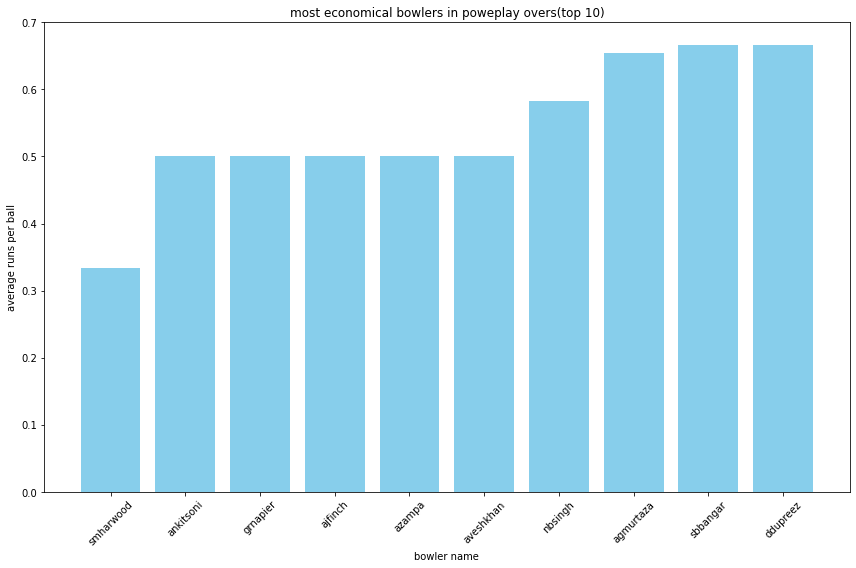

In [0]:
economical_bowlers_powerplay_pd= economical_bowlers_powerplay.toPandas()

plt.figure(figsize = (12,8))
top_eco_bowlers = economical_bowlers_powerplay_pd.nsmallest(10, 'avg_runs_per_ball')
plt.bar(top_eco_bowlers ['player_name'],top_eco_bowlers ['avg_runs_per_ball'],color ='skyblue')
plt.xlabel('bowler name')
plt.ylabel('average runs per ball')
plt.title('most economical bowlers in poweplay overs(top 10)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [0]:
import seaborn as sns

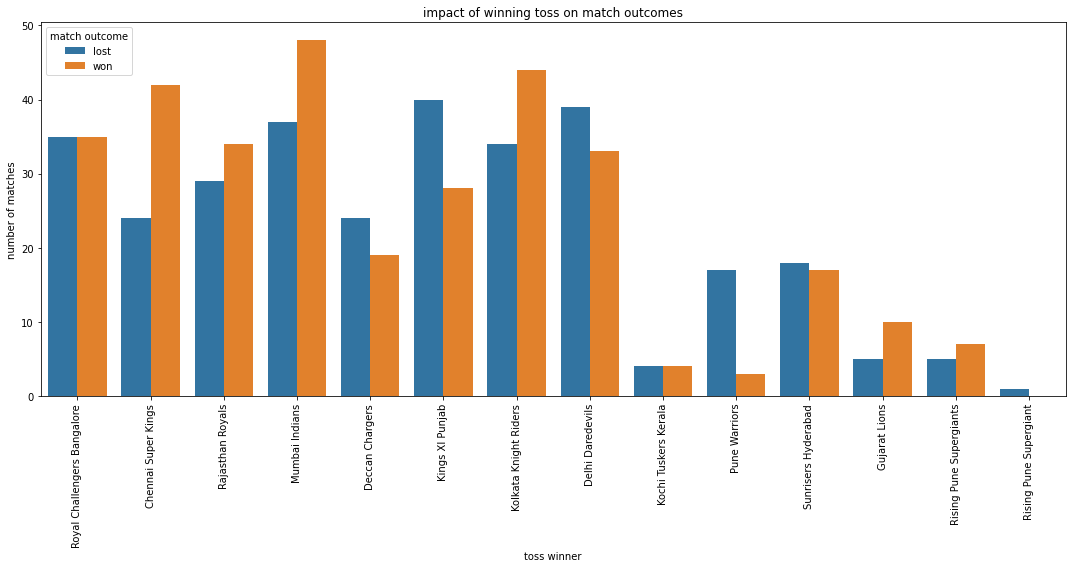

In [0]:
tossimpact_df= tossimpact.toPandas()
#creating a countplot to show win/loss after winning toss
plt.figure(figsize=(15,8))
sns.countplot(x='toss_winner',hue='MATCH_OUTCOME',data= tossimpact_df)
plt.title('impact of winning toss on match outcomes')
plt.xlabel('toss winner')
plt.ylabel('number of matches')
plt.legend(title='match outcome')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [0]:
tossimpact_df.()

match_id 
 toss_winner 
 toss_name 
 match_winner 
 MATCH_OUTCOME 
 
 
 
 
 0 
 335987 
 Royal Challengers Bangalore 
 field 
 Kolkata Knight Riders 
 lost 
 
 
 1 
 335988 
 Chennai Super Kings 
 bat 
 Chennai Super Kings 
 won 
 
 
 2 
 335989 
 Rajasthan Royals 
 bat 
 Delhi Daredevils 
 lost 
 
 
 3 
 335990 
 Mumbai Indians 
 bat 
 Royal Challengers Bangalore 
 lost 
 
 
 4 
 335991 
 Deccan Chargers 
 bat 
 Kolkata Knight Riders 
 lost

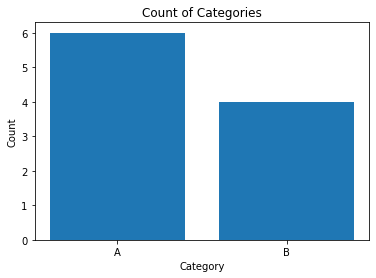

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = {'Category': ['A', 'A', 'B', 'A', 'B', 'B', 'A', 'A', 'B', 'A']}
df = pd.DataFrame(data)

# Count the occurrences of each category
counts = df['Category'].value_counts()

# Create a bar plot
plt.bar(counts.index, counts)

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of Categories')

# Display the plot
plt.show()


In [0]:
avg_runs_in_wins_df= avg_runs_in_wins.toPandas()

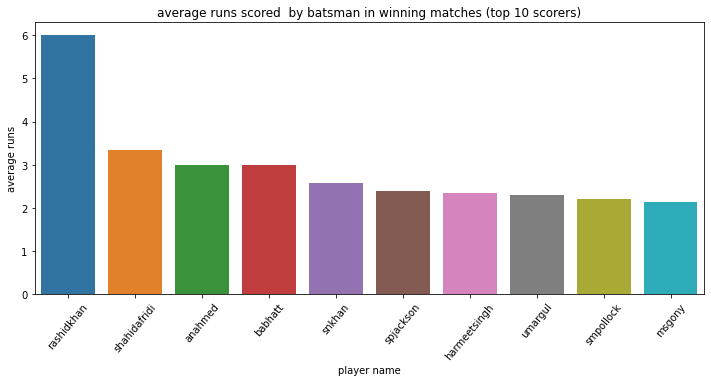

In [0]:
plt.figure(figsize=(12,5))
top_scores= avg_runs_in_wins_df.nlargest(10,'avg_runs_in_wins')
# plt.bar(x=top_scores['player_name'],height=top_scores['avg_runs_in_wins'])
sns.barplot(x='player_name',y='avg_runs_in_wins',data=top_scores)
plt.xticks(rotation=50)
plt.xlabel('player name')
plt.ylabel('average runs')
plt.title('average runs scored  by batsman in winning matches (top 10 scorers)')
plt.show()



In [0]:
# sql query to fetch average runs scored in each venue
scores_by_venue = spark.sql(
"""
with total_runs_per_match as(
select mv.match_id, mv.venue_name , sum(bv.runs_scored) as total_runs
 from match_view mv  join bbb_view bv
 on mv.match_id= bv.match_id
 group by mv.match_id, mv.venue_name
 )
 select venue_name, avg(total_runs) as average_runs , max(total_runs) as highest_score from total_runs_per_match group by venue_name order by average_runs desc;
"""
)

In [0]:
scores_by_venue_df= scores_by_venue.toPandas()
# sorted_scores_by_venue_df = scores_by_venue_df.sort_values('average_runs',ascending =False)

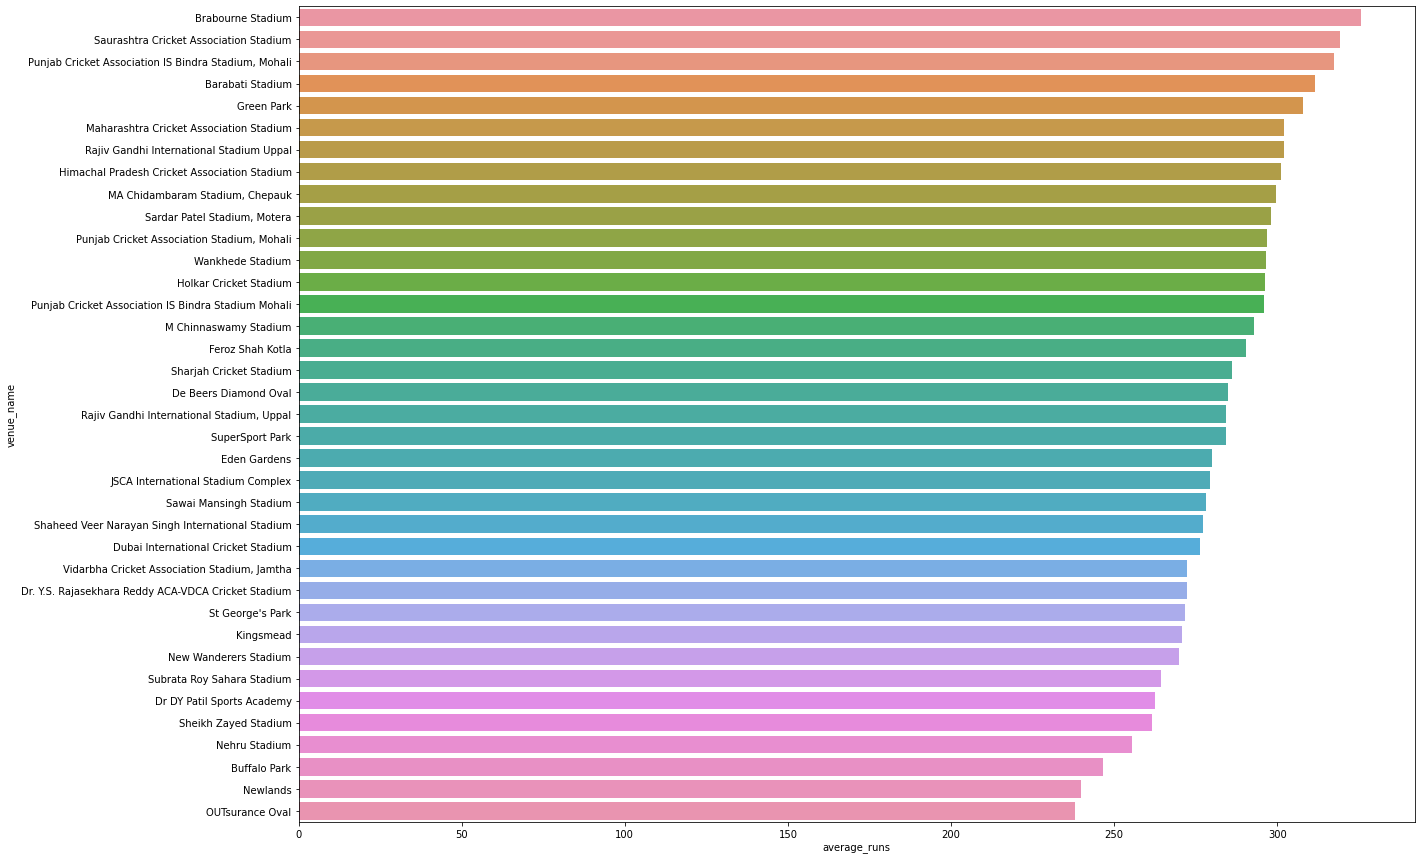

In [0]:
plt.figure(figsize=(20,15))
# plt.barh(width=sorted_scores_by_venue_df['average_runs'],y=sorted_scores_by_venue_df['venue_name'])
sns.barplot(x='average_runs',y='venue_name',data=scores_by_venue_df )
plt
plt.show()

In [0]:
dismissal_type= spark.sql(
    """
select 
out_type , count(*) as frequency
from bbb_view where out_type is not null
group by out_type
order by frequency desc;
"""
)



In [0]:
dismissal_type_df= dismissal_type.toPandas()

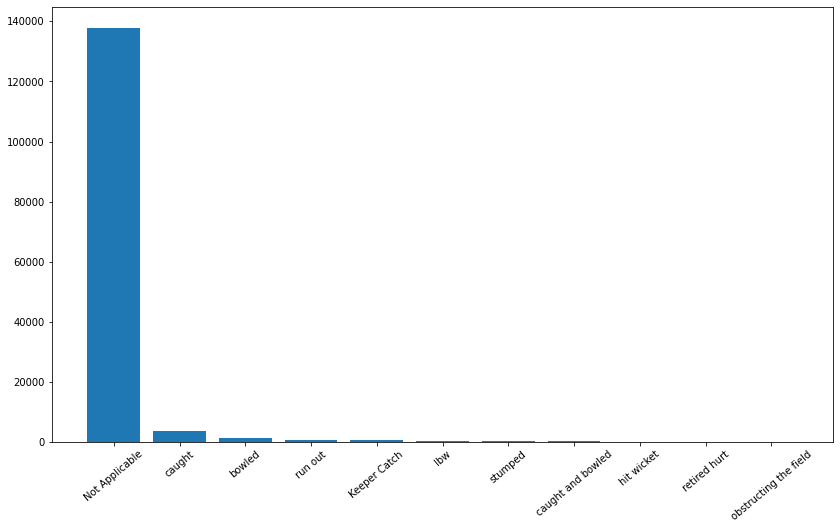

In [0]:
plt.figure(figsize=(14,8))
plt.bar(x=dismissal_type_df['out_type'],height=dismissal_type_df['frequency'])
plt.xticks(rotation=40)
plt.show()

In [0]:

team_won_after_toss=spark.sql(
    """
select team1, count(*) as matches_played  ,
sum(case when toss_winner= match_winner then 1 else 0 end) as team_won_after_toss
from  match_view
where toss_winner = team1
group by team1
order by team_won_after_toss desc;
"""
)

In [0]:
team_won_after_toss_df= team_won_after_toss.toPandas()

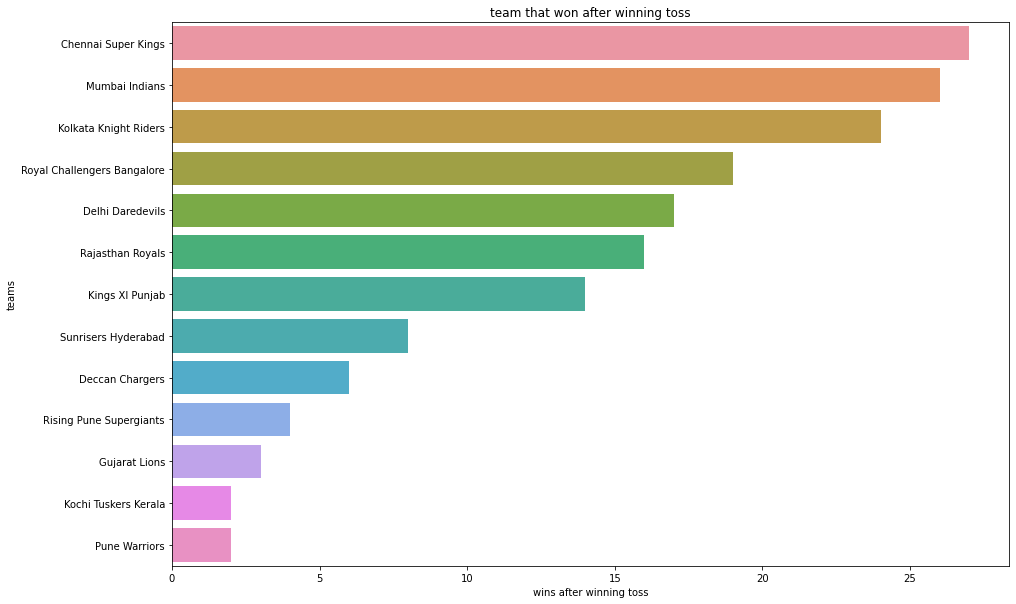

In [0]:

plt.figure(figsize=(15,10))
sns.barplot(x='team_won_after_toss', y= 'team1', data=team_won_after_toss_df)
plt.title('team that won after winning toss')
plt.xlabel('wins after winning toss')
plt.ylabel('teams')
plt.show()